In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.feature_extraction.text import CountVectorizer
import spacy
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('spotify_netflix.csv')

In [3]:
df = df[df['text_length'] > 10]

### CountVectorizer

In [4]:
#Instantiate a CountVectorizer object
cvec = CountVectorizer(stop_words= 'english')

#Fit the count vectorizer on text
cvec.fit(df['text'])

CountVectorizer(stop_words='english')

In [5]:
#Store the transformed data
#Convert to a dataframe and store
df_cvec= pd.DataFrame(cvec.transform(df['text']).todense(),
                  columns = cvec.get_feature_names())

In [6]:
df_cvec.T.sort_values(0, ascending = False).head(25).T

,songs,playlist,mood,kushal,spotify,dark,00,pigs,pilot,pills,...,piers,pig,pin,pierre,pierces,pierce,piensas,piecesofawoman,pieces,piece
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
spotify_netflix_cvec = pd.concat([df[['is_spotify','text_length','text_word_count']],df_cvec], axis =1)

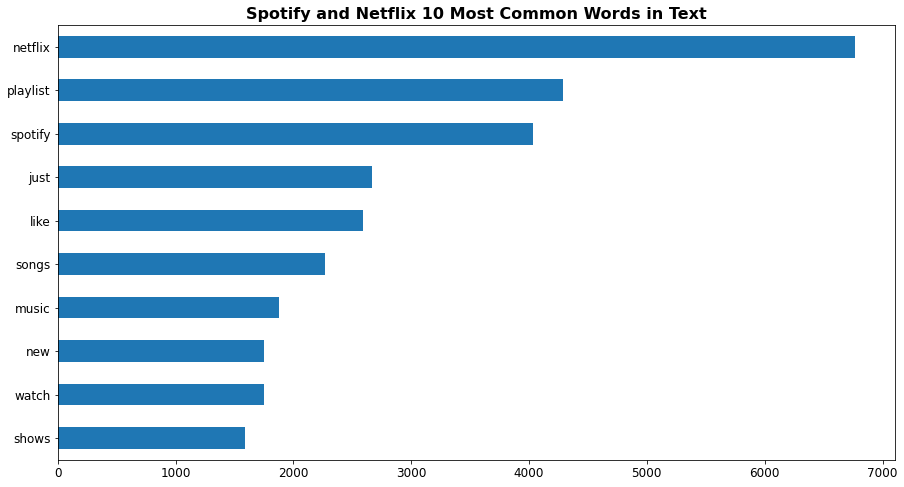

In [25]:
plt.figure(figsize=(15,8))
df_cvec.sum().sort_values(ascending = False).head(10).sort_values(ascending= True).plot(kind='barh')

plt.title('Spotify and Netflix 10 Most Common Words in Text',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12);

<AxesSubplot:xlabel='is_spotify', ylabel='text_length'>

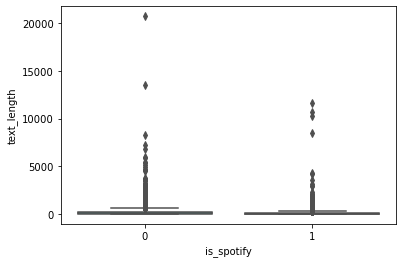

In [9]:
sns.boxplot(x= 'is_spotify', y = 'text_length', data = df, palette = 'rainbow')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


''

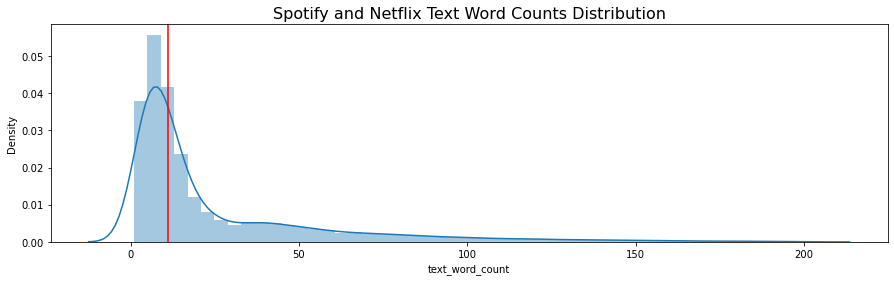

In [10]:
plt.figure(figsize = (15,4))
plt.title ('Spotify and Netflix Text Word Counts Distribution', fontsize = 16)
sns.distplot(df[df['text_word_count'] <= 200]['text_word_count'])
plt.axvline(df[df['text_word_count'] <= 200]['text_word_count'].median(), color='r')
;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


''

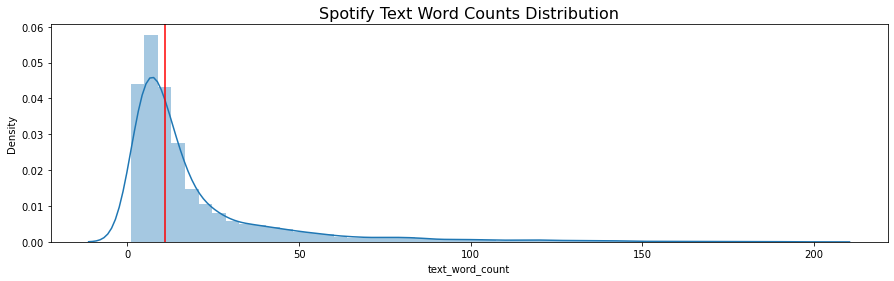

In [11]:
plt.figure(figsize = (15,4))
plt.title ('Spotify Text Word Counts Distribution', fontsize = 16)
sns.distplot(df[(df['text_word_count'] <= 200) & (df['is_spotify'] == 1)]['text_word_count'])
plt.axvline(df[(df['text_word_count'] <= 200) & (df['is_spotify'] == 1)]['text_word_count'].median(), color='r')
;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


''

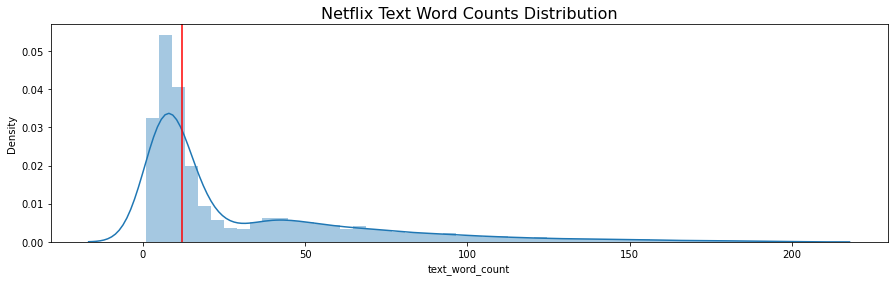

In [12]:
plt.figure(figsize = (15,4))
plt.title ('Netflix Text Word Counts Distribution', fontsize = 16)
sns.distplot(df[(df['text_word_count'] <= 200) & (df['is_spotify'] == 0)]['text_word_count'])
plt.axvline(df[(df['text_word_count'] <= 200) & (df['is_spotify'] == 0)]['text_word_count'].median(), color='r')
;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


''

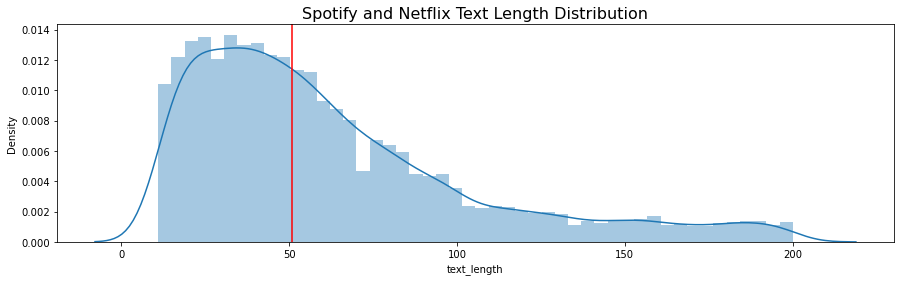

In [13]:
plt.figure(figsize = (15,4))
plt.title ('Spotify and Netflix Text Length Distribution', fontsize = 16)
sns.distplot(df[df['text_length'] <= 200]['text_length'])
plt.axvline(df[df['text_length'] <= 200]['text_length'].median(), color='r')
;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


''

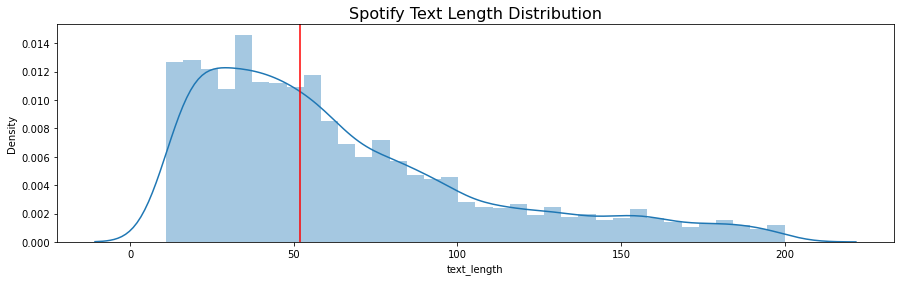

In [14]:
plt.figure(figsize = (15,4))
plt.title ('Spotify Text Length Distribution', fontsize = 16)
sns.distplot(df[(df['text_length'] <= 200) & (df['is_spotify'] == 1)]['text_length'])
plt.axvline(df[(df['text_length'] <= 200) & (df['is_spotify'] == 1)]['text_length'].median(), color='r')
;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


''

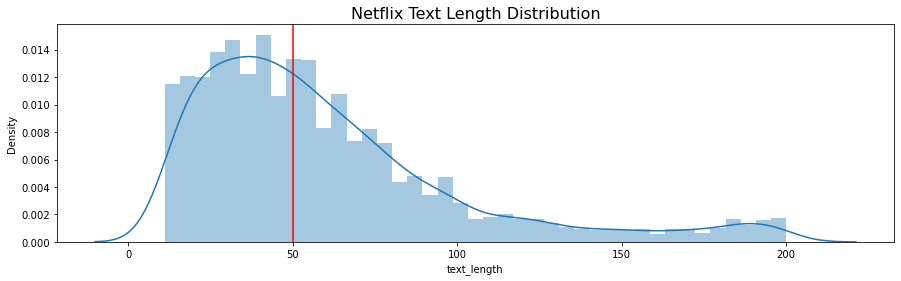

In [15]:
plt.figure(figsize = (15,4))
plt.title ('Netflix Text Length Distribution', fontsize = 16)
sns.distplot(df[(df['text_length'] <= 200) & (df['is_spotify'] == 0)]['text_length'])
plt.axvline(df[(df['text_length'] <= 200) & (df['is_spotify'] == 0)]['text_length'].median(), color='r')
;

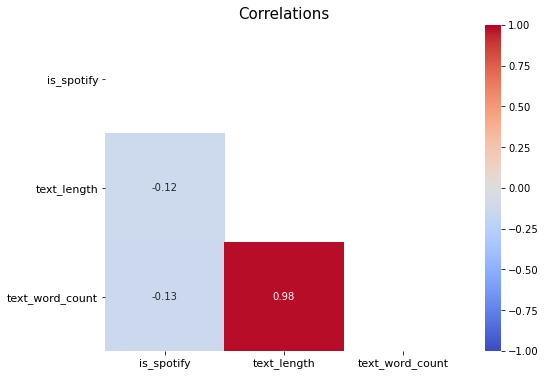

In [16]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True,
            cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title('Correlations', fontsize = 15)
plt.xticks(rotation=0, fontsize = 11)
plt.yticks(rotation = 0,fontsize = 11);

### TfidfVectorizer

In [17]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words = 'english')
tvec.fit(df['text'])

TfidfVectorizer(stop_words='english')

In [19]:
df_tvec = pd.DataFrame(tvec.transform(df['text']).todense(),
                  columns = tvec.get_feature_names())

In [21]:
#df_tvec.T.sort_values(0,ascending = False).head(10).T

In [26]:
#df_tvec.sum().sort_values()

In [27]:
#spotify_netflix_tvec = pd.merge(df,df_tvec, how = 'left')
#spotify_netflix_tvec = pd.concat([df,df_tvec], axis =1)

In [ ]:
spotify_netflix_tvec.shape

In [ ]:
df_tvec.shape

In [ ]:
df.shape

In [ ]:
spotify_netflix_tvec_25 = spotify_netflix_tvec.drop(columns=['is_spotify','text_length','text_word_count']).sum().sort_values(ascending = False).head(25)

In [ ]:
spotify_netflix_tvec_25

In [ ]:
plt.figure(figsize=(12,8))
spotify_netflix_tvec_25.sort_values(ascending= True).plot(kind='barh')

plt.title('TFIDF Spotify and Netflix 25 Most Common Words in Text',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12);